## Importing some Necessary python packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import keras 
import zipfile

In [2]:
path = 'archive.zip'
with zipfile.ZipFile(path , 'r') as zip_ref: 
    zip_ref.extractall()

## Loading Directories

In [3]:
train_dir = 'train'
test_dir = 'test'

In [4]:
x_train = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='int',
    shuffle = True,
    batch_size = 32, 
    validation_split = None,
    seed= None,
    verbose=True,
    
)

Found 28709 files belonging to 7 classes.


In [5]:
x_test = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='int',
    shuffle = True,
    batch_size = 32, 
    validation_split = None,
    seed= None,
    verbose=True,
    
)

Found 7178 files belonging to 7 classes.


## Preprocessing some Images

In [6]:
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Convert to float and normalize
    return image, label

# Apply normalization to both datasets
x_train = x_train.map(normalize)
x_test = x_test.map(normalize)

# Optional: Prefetch for better performance
x_train = x_train.prefetch(tf.data.AUTOTUNE)
x_test = x_test.prefetch(tf.data.AUTOTUNE)

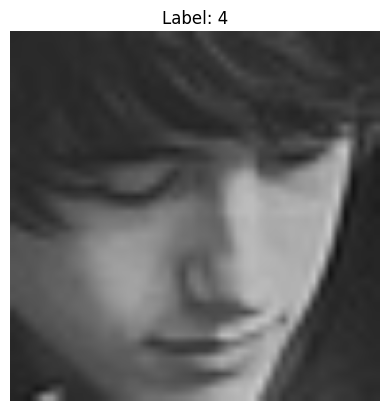

In [7]:
for images, labels in x_test.take(1):  # Take 1 batch
    # Clip pixel values to the range [0, 255]
    clipped_image = np.clip(images[0].numpy().squeeze(), 0, 255)
    
    # Display the clipped image
    plt.imshow(clipped_image, cmap='gray')  
    plt.title(f"Label: {labels[0].numpy()}")
    plt.axis('off')  # Hide axes for better visualization
    plt.show()
    break  # Exit after displaying one batch

## Making CNN architecture by USING Functional API

In [8]:
# importing some necessary libraries of tensorflow
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential


In [9]:
data_iter = iter(x_test)

# Extract the next batch (images and labels)
images, labels = next(data_iter)
images.shape

TensorShape([32, 256, 256, 3])

In [10]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Input layer
input_layer = Input(shape=(256, 256, 3))

# Convolutional and pooling layers
X = Conv2D(32, (3, 3), activation='relu')(input_layer)
X = MaxPooling2D(pool_size=(2, 2))(X)

X = Conv2D(64, (3, 3), activation='relu')(X)
X = MaxPooling2D(pool_size=(2, 2))(X)

# Flatten and fully connected layers
X = Flatten()(X)
X = Dense(128, activation='relu')(X)
X = Dropout(0.2)(X)

X = Dense(300, activation='relu')(X)
X = Dropout(0.1)(X)

# Output layer (7 classes)
output_layer = Dense(7, activation='softmax')(X)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For integer-labeled classification tasks
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      31,490,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 300)                 │          38,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           2,107 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,550,375 (120.36 MB)

 Trainable params: 31,550,375 (120.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, epochs=10, validation_data=x_test)

Epoch 1/10
 11/898 ━━━━━━━━━━━━━━━━━━━━ 23:44 2s/step - accuracy: 0.2403 - loss: 4.5217